In [1]:
import matplotlib.pyplot as plt

import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration4').getOrCreate()

In [2]:
# Reading the datasets
dataset_one = spark.read.csv('./student-math-dataset1.csv', header=True, inferSchema=True)
dataset_two = spark.read.csv('./student-math-dataset2.csv', header=True, inferSchema=True)

In [3]:
# 2.2 Describe the data
print("Dataset one structure: " + str(dataset_one.count()) + " rows, and " + str(len(dataset_one.columns)) + " columns")
print("Dataset two structure: " + str(dataset_two.count()) + " rows, and " + str(len(dataset_two.columns)) + " columns")
print("How many students inside the dataset: " + str(dataset_one.count()))

Dataset one structure: 395 rows, and 31 columns
Dataset two structure: 395 rows, and 4 columns
How many students inside the dataset: 395


In [4]:
print("Data type inside the dataset one")
dataset_one.dtypes
# print(dataset_one.printSchema())
# print(dataset_two.printSchema())

Data type inside the dataset one


[('id', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'double'),
 ('goout', 'int'),
 ('Dalc', 'double'),
 ('Walc', 'double'),
 ('health', 'double'),
 ('absences', 'int')]

In [5]:
print("Data type inside the dataset two")
dataset_two.dtypes

Data type inside the dataset two


[('id', 'int'), ('G1', 'int'), ('G2', 'int'), ('G3', 'int')]

In [6]:
# 2.3 Explore the data
# need to see the difference between .show() vs .describe().shows()
print("Dataset one information: ")
dataset_one.describe().show() # truncate=False

Dataset one information: 
+-------+------------------+------+----+------------------+-------+-------+-------+------------------+------------------+-------+-------+----------+--------+------------------+------------------+------------------+---------+------+----+----------+-------+------+--------+--------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+
|summary|                id|school| sex|               age|address|famsize|Pstatus|              Medu|              Fedu|   Mjob|   Fjob|    reason|guardian|        traveltime|         studytime|          failures|schoolsup|famsup|paid|activities|nursery|higher|internet|romantic|            famrel|          freetime|             goout|              Dalc|              Walc|            health|         absences|
+-------+------------------+------+----+------------------+-------+-------+-------+------------------+------------------+-------+-------+----------+

In [7]:
dataset_two.describe().show()

+-------+------------------+------------------+------------------+------------------+
|summary|                id|                G1|                G2|                G3|
+-------+------------------+------------------+------------------+------------------+
|  count|               395|               395|               395|               395|
|   mean|             198.0| 10.90886075949367|10.713924050632912|10.415189873417722|
| stddev|114.17092449481173|3.3191946715076686|3.7615046595560306|4.5814426109978434|
|    min|                 1|                 3|                 0|                 0|
|    max|               395|                19|                19|                20|
+-------+------------------+------------------+------------------+------------------+



In [8]:
# same as above
# dataset_one.select(dataset_one.columns).describe().show()
# dataset_two.select('G1', 'G2', 'G3').describe().show()

Student first year grade distribution: 


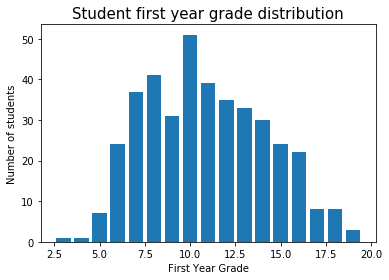

In [9]:
print("Student first year grade distribution: ")
plt.xlabel('First Year Grade', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Student first year grade distribution', fontsize = 15)
diagram_one = dataset_two.toPandas()['G1'].value_counts()
plt.bar(diagram_one.index, diagram_one.values)
plt.show()

Student second year grade distribution: 


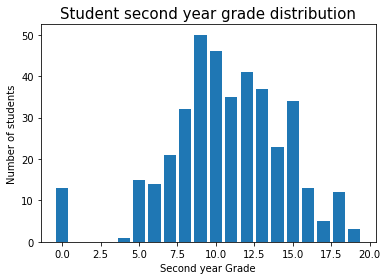

In [10]:
print("Student second year grade distribution: ")
plt.xlabel('Second year Grade', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Student second year grade distribution', fontsize = 15)
diagram_two = dataset_two.toPandas()['G2'].value_counts()
plt.bar(diagram_two.index, diagram_two.values)
plt.show()

Student final year grade distribution: 


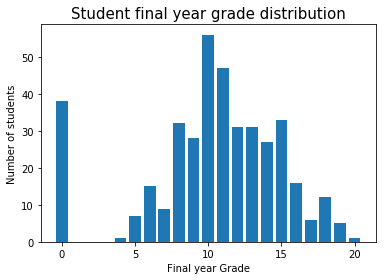

In [11]:
print("Student final year grade distribution: ")
plt.xlabel('Final year Grade', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Student final year grade distribution', fontsize = 15)
diagram_three = dataset_two.toPandas()['G3'].value_counts()
plt.bar(diagram_three.index, diagram_three.values)
plt.show()

Gender distribution inside the dataset: 


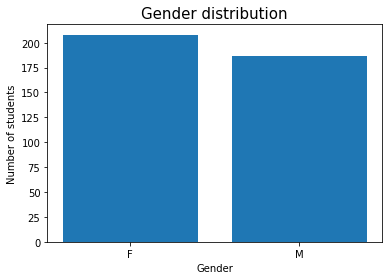

Number of male students: 187
Number of female students: 208


In [12]:
print("Gender distribution inside the dataset: ")
plt.xlabel('Gender', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Gender distribution', fontsize = 15)
diagram_four = dataset_one.toPandas()['sex'].value_counts()
plt.bar(diagram_four.index, diagram_four.values)
plt.show()

print('Number of male students:', len(dataset_one.toPandas()[dataset_one.toPandas()['sex'] == 'M']))
print('Number of female students:', len(dataset_one.toPandas()[dataset_one.toPandas()['sex'] == 'F']))

Student age distribution: 


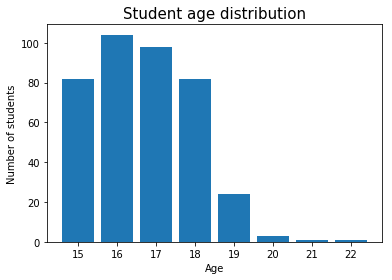

In [13]:
print("Student age distribution: ")
plt.xlabel('Age', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Student age distribution', fontsize = 15)
diagram_five = dataset_one.toPandas()['age'].value_counts()
plt.bar(diagram_five.index, diagram_five.values)
plt.show()

Student in Urban or rural areas distribution


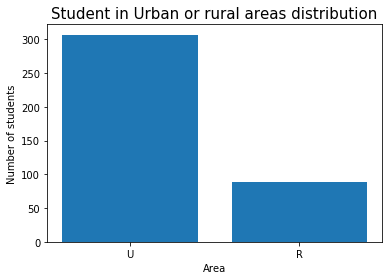

Number of students in urban area: 307
Number of students in rural area: 88


In [14]:
print("Student in Urban or rural areas distribution")
plt.xlabel('Area', fontsize = 10)
plt.ylabel('Number of students', fontsize = 10)
plt.title('Student in Urban or rural areas distribution', fontsize = 15)
diagram_six = dataset_one.toPandas()['address'].value_counts()
plt.bar(diagram_six.index, diagram_six.values)
plt.show()

print('Number of students in urban area:', len(dataset_one.toPandas()[dataset_one.toPandas()['address'] == 'U']))
print('Number of students in rural area:', len(dataset_one.toPandas()[dataset_one.toPandas()['address'] == 'R']))

In [15]:
from pyspark.sql.functions import isnan, when, count, col
# 2.4 Verify the data quality
# missing value from freetime, dalc, walc, health field.
print("Missing value or null value in dataset one: ")
print(dataset_one.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset_one.columns]).toPandas().transpose())
print()
print("Missing value or null value in dataset two: ")
print(dataset_two.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset_two.columns]).toPandas().transpose())

Missing value or null value in dataset one: 
            0
id          0
school      0
sex         0
age         0
address     0
famsize     0
Pstatus     0
Medu        0
Fedu        0
Mjob        0
Fjob        0
reason      0
guardian    0
traveltime  0
studytime   0
failures    0
schoolsup   0
famsup      0
paid        0
activities  0
nursery     0
higher      0
internet    0
romantic    0
famrel      0
freetime    2
goout       0
Dalc        3
Walc        2
health      2
absences    0

Missing value or null value in dataset two: 
    0
id  0
G1  0
G2  0
G3  0


In [86]:
# 3.4 integraet various data source
# combine the dataset
dataset_three = dataset_one.join(dataset_two, on=['id'])
print("Dataset one structure: " + str(dataset_three.count()) + " rows, and " + str(len(dataset_three.columns)) + " columns")

Dataset one structure: 395 rows, and 34 columns


In [17]:
# 2.3 Explore the data（more ploting)
# plot more diagram in this section

Students go out time: 


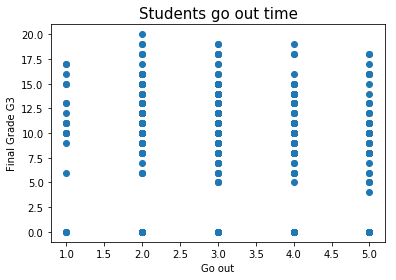

In [18]:
print("Students go out time: ")
diagram_seven_x = dataset_three.toPandas()['goout']
diagram_seven_y = dataset_three.toPandas()['G3']
plt.xlabel('Go out', fontsize = 10)
plt.ylabel('Final Grade G3', fontsize = 10)
plt.title('Students go out time', fontsize = 15)
plt.scatter(diagram_seven_x, diagram_seven_y)
plt.show()

Students study time: 


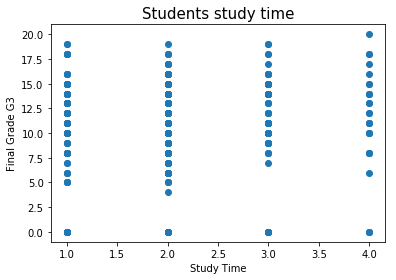

In [19]:
print("Students study time: ")
diagram_eight_x = dataset_three.toPandas()['studytime']
diagram_eight_y = dataset_three.toPandas()['G3']
plt.xlabel('Study Time', fontsize = 10)
plt.ylabel('Final Grade G3', fontsize = 10)
plt.title('Students study time', fontsize = 15)
plt.scatter(diagram_eight_x, diagram_eight_y)
plt.show()

Mother's job:


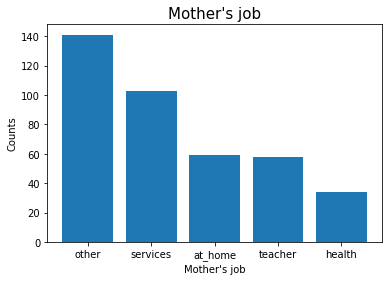

In [20]:
print("Mother's job:")
plt.xlabel("Mother's job", fontsize = 10)
plt.ylabel('Counts', fontsize = 10)
plt.title("Mother's job", fontsize = 15)
diagram_nine = dataset_three.toPandas()["Mjob"].value_counts()
plt.bar(diagram_nine.index, diagram_nine.values)
plt.show()

Father's job:


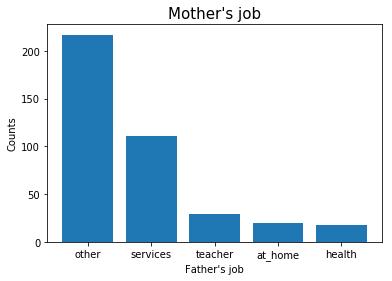

In [21]:
print("Father's job:")
plt.xlabel("Father's job", fontsize = 10)
plt.ylabel('Counts', fontsize = 10)
plt.title("Mother's job", fontsize = 15)
diagram_ten = dataset_three.toPandas()["Fjob"].value_counts()
plt.bar(diagram_ten.index, diagram_ten.values)
plt.show()

Father's education level:


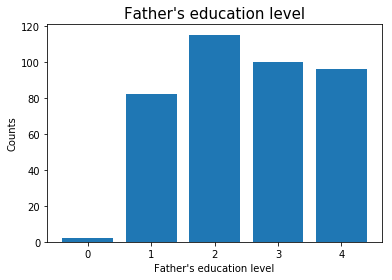

In [22]:
print("Father's education level:")
plt.xlabel("Father's education level", fontsize = 10)
plt.ylabel('Counts', fontsize = 10)
plt.title("Father's education level", fontsize = 15)
diagram_eleven = dataset_three.toPandas()["Fedu"].value_counts()
plt.bar(diagram_eleven.index, diagram_eleven.values)
plt.show()

Mother's education level:


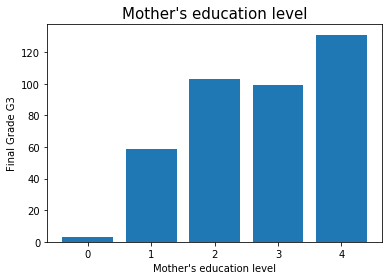

In [23]:
print("Mother's education level:")
plt.xlabel("Mother's education level", fontsize = 10)
plt.ylabel('Final Grade G3', fontsize = 10)
plt.title("Mother's education level", fontsize = 15)
diagram_twelve = dataset_three.toPandas()["Medu"].value_counts()
plt.bar(diagram_twelve.index, diagram_twelve.values)
plt.show()

In [87]:
# 3.2 Clean the data
# removing the missing value
print("Dataset three length before removing the missing value:", dataset_three.count())
dataset_three = dataset_three.na.drop()
print("Dataset three length after removing the missing value:", dataset_three.count())

Dataset three length before removing the missing value: 395
Dataset three length after removing the missing value: 387


In [80]:
# 3.5 Format the data as required
print("Data type inside the dataset three before formating: ")
dataset_three.dtypes

Data type inside the dataset three before formating: 


[('id', 'int'),
 ('school', 'string'),
 ('sex', 'string'),
 ('age', 'int'),
 ('address', 'string'),
 ('famsize', 'string'),
 ('Pstatus', 'string'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('Mjob', 'string'),
 ('Fjob', 'string'),
 ('reason', 'string'),
 ('guardian', 'string'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('schoolsup', 'string'),
 ('famsup', 'string'),
 ('paid', 'string'),
 ('activities', 'string'),
 ('nursery', 'string'),
 ('higher', 'string'),
 ('internet', 'string'),
 ('romantic', 'string'),
 ('famrel', 'int'),
 ('freetime', 'double'),
 ('goout', 'int'),
 ('Dalc', 'double'),
 ('Walc', 'double'),
 ('health', 'double'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int')]

In [69]:
# from pyspark.ml.feature import StringIndexer
# indexer = StringIndexer(inputCol="Mjob", outputCol="Mjob_index")
# dataset_three = indexer.fit(dataset_three).transform(dataset_three)
# dataset_three = dataset_three.drop('Mjob')

In [88]:
types = dict(dataset_three.dtypes)
column_names = []
for key, value in types.items():
    if value == 'string':
        column_names.append(key)
print(column_names)

['guardian', 'Pstatus', 'paid', 'Fjob', 'activities', 'schoolsup', 'sex', 'address', 'internet', 'reason', 'Mjob', 'famsize', 'higher', 'school', 'famsup', 'romantic', 'nursery']


In [89]:
from pyspark.ml.feature import StringIndexer
for item in column_names:
    indexer = StringIndexer(inputCol=str(item), outputCol= str(item) + '_index')
    dataset_three = indexer.fit(dataset_three).transform(dataset_three)
for item in column_names:
    dataset_three = dataset_three.drop(item)

In [90]:
dataset_three.dtypes

[('id', 'int'),
 ('age', 'int'),
 ('Medu', 'int'),
 ('Fedu', 'int'),
 ('traveltime', 'int'),
 ('studytime', 'int'),
 ('failures', 'int'),
 ('famrel', 'int'),
 ('freetime', 'double'),
 ('goout', 'int'),
 ('Dalc', 'double'),
 ('Walc', 'double'),
 ('health', 'double'),
 ('absences', 'int'),
 ('G1', 'int'),
 ('G2', 'int'),
 ('G3', 'int'),
 ('guardian_index', 'double'),
 ('Pstatus_index', 'double'),
 ('paid_index', 'double'),
 ('Fjob_index', 'double'),
 ('activities_index', 'double'),
 ('schoolsup_index', 'double'),
 ('sex_index', 'double'),
 ('address_index', 'double'),
 ('internet_index', 'double'),
 ('reason_index', 'double'),
 ('Mjob_index', 'double'),
 ('famsize_index', 'double'),
 ('higher_index', 'double'),
 ('school_index', 'double'),
 ('famsup_index', 'double'),
 ('romantic_index', 'double'),
 ('nursery_index', 'double')]

In [95]:
# 3.2 Clean the data (part two)
# removing the outliers value
# import numpy as np
# from scipy import stats
# print("Dataset three length before removing the outliers value:", dataset_three.count())
# dataset_three_z = np.abs(stats.zscore(dataset_three))
# threshold = 5
# dataset_three = dataset_three[(dataset_three_z <= threshold).all(axis=1)]
# print("Dataset three length after removing the outliers value:", dataset_three.count())

ImportError: No module named 'scipy'

In [97]:
# 4.1 Reduce the data
# Find correlations with the Grade
dataset_three_correlated_fileds = dataset_three.corr()['G3'].sort_values(ascending=False)
print("List out the top 30 fields which has strong correlations relationship with the Final Grade G3: ")
print(dataset_three_correlated_fileds[0:30])

/bin/sh: 1: pip: not found


In [100]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

df = spark.createDataFrame([
    (7, Vectors.dense([0.0, 0.0, 18.0, 1.0]), 1.0,),
    (8, Vectors.dense([0.0, 1.0, 12.0, 0.0]), 0.0,),
    (9, Vectors.dense([1.0, 0.0, 15.0, 0.1]), 0.0,)], ["id", "features", "clicked"])

selector = ChiSqSelector(numTopFeatures=1, featuresCol="features",
                         outputCol="selectedFeatures", labelCol="clicked")

result = selector.fit(df).transform(df)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
result.show()

ChiSqSelector output with top 1 features selected
+---+------------------+-------+----------------+
| id|          features|clicked|selectedFeatures|
+---+------------------+-------+----------------+
|  7|[0.0,0.0,18.0,1.0]|    1.0|          [18.0]|
|  8|[0.0,1.0,12.0,0.0]|    0.0|          [12.0]|
|  9|[1.0,0.0,15.0,0.1]|    0.0|          [15.0]|
+---+------------------+-------+----------------+



In [102]:
from pyspark.ml.feature import ChiSqSelector
from pyspark.ml.linalg import Vectors

selector = ChiSqSelector(numTopFeatures=1, featuresCol="G2",
                         outputCol="selectedFeatures", labelCol="G3")
result = selector.fit(dataset_three).transform(dataset_three)

print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
result.show()

IllegalArgumentException: 'requirement failed: Column G2 must be of type org.apache.spark.ml.linalg.VectorUDT@3bfc3ba7 but was actually IntegerType.'

In [ ]:
# 4.2 Project the data
# Removed
# Will only grabe the top 10 most correlation features for the further study
dataset_three_correlated_fileds = dataset_three_correlated_fileds[:10]
print(dataset_three_correlated_fileds)

dataset_three = dataset_three.loc[:, dataset_three_correlated_fileds.index]
print("\nThe final dataset strucure after cleaning and data transformation:", dataset_three.shape)

In [30]:
dataset_three = dataset_one.join(dataset_two, on=['id'])

In [31]:
dataset_three.count()

395

In [11]:
# from pyspark.ml.feature import ChiSqSelector
# from pyspark.ml.linalg import Vectors

# df = spark.createDataFrame([
#     (7, Vectors.dense([0.0, 0.0, 18.0, 1.0]), 1.0,),
#     (8, Vectors.dense([0.0, 1.0, 12.0, 0.0]), 0.0,),
#     (9, Vectors.dense([1.0, 0.0, 15.0, 0.1]), 0.0,)], ["id", "features", "clicked"])

# selector = ChiSqSelector(numTopFeatures=1, featuresCol="features",
#                          outputCol="selectedFeatures", labelCol="clicked")

# result = selector.fit(df).transform(df)

# print("ChiSqSelector output with top %d features selected" % selector.getNumTopFeatures())
# result.show()


In [16]:
# from pyspark.ml.feature import PCA
# from pyspark.ml.linalg import Vectors

# data = [(Vectors.sparse(5, [(1, 1.0), (3, 7.0)]),),
#         (Vectors.dense([2.0, 0.0, 3.0, 4.0, 5.0]),),
#         (Vectors.dense([4.0, 0.0, 0.0, 6.0, 7.0]),)]
# df = spark.createDataFrame(data, ["features"])

# pca = PCA(k=3, inputCol="features", outputCol="pcaFeatures")
# model = pca.fit(df)

# result = model.transform(df).select("pcaFeatures")
# result.show(truncate=False)

+-----------------------------------------------------------+
|pcaFeatures                                                |
+-----------------------------------------------------------+
|[1.6485728230883807,-4.013282700516296,-5.524543751369388] |
|[-4.645104331781534,-1.1167972663619026,-5.524543751369387]|
|[-6.428880535676489,-5.337951427775355,-5.524543751369389] |
+-----------------------------------------------------------+

